# Lecture 10 Code: MLPs and CNNs

<img src="https://www.pngitem.com/pimgs/m/346-3460684_machine-learning-neural-network-deep-learning-hd-png.png" width=400>

In [1]:
#!conda install pytorch torchvision -c pytorch -y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from IPython.display import display
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Part 1: MLP with sklearn

In [2]:
# import data, put into a dataframe
data = datasets.load_wine()
inputs = data['data']
labels = data['target']
df = pd.DataFrame(inputs)
df.columns = data['feature_names']
df['CLASS'] = labels

# display to make sure it's ok
display(df)
df.CLASS.value_counts()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,CLASS
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


1    71
0    59
2    48
Name: CLASS, dtype: int64

In [3]:
# create our train and test data

X = df.drop('CLASS', axis=1)
y = df.CLASS

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=0)

'Accuracy: 0.9629629629629629'

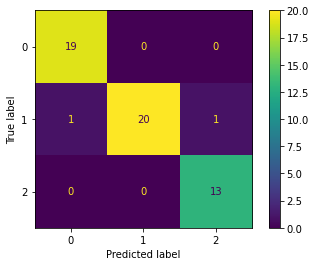

In [4]:
# create a MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=5000, random_state=0)
mlp.fit(Xtrain, ytrain)
ypr = mlp.predict(Xtest)
scr = mlp.score(Xtest, ytest)

ConfusionMatrixDisplay(confusion_matrix(ytest, ypr)).plot()
display(f"Accuracy: {scr}")

# Part 2: MLP with PyTorch

In [1]:
# First, we need to modify our data to tensors
# More reading for tensors: 

Xtr, Xte, ytr, yte = torch.tensor(Xtrain.values).float(), torch.tensor(Xtest.values).float(), torch.tensor(ytrain.values).float(), torch.tensor(ytest.values).float()

ytr = ytr.type(torch.LongTensor)
yte = yte.type(torch.LongTensor)

NameError: name 'torch' is not defined

In [6]:
# Let's create our MLP class (which inherits from torch.nn.Module)
class MLP(torch.nn.Module):
        # specify class variables
        def __init__(self, input_size, hidden_size):
            super(MLP, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.fc2 = torch.nn.Linear(self.hidden_size, 3)
            self.sigmoid = torch.nn.Sigmoid()      

        # specify the forward method
        def forward(self,x):
            #Note: softmax usually used for the final layer for multiple class outputs
            output = self.sigmoid(self.fc2(self.sigmoid(self.fc1(x))))
            return output

# Define our model. We have 13 input features; let's use 100 hidden neurons
mlp2 = MLP(13,100)
print(mlp2)
loss = torch.nn.CrossEntropyLoss() # same loss function used in sklearn (log loss)
optim = torch.optim.Adam(mlp2.parameters(), lr=0.001)

MLP(
  (fc1): Linear(in_features=13, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=3, bias=True)
  (sigmoid): Sigmoid()
)


In [7]:
# Ok, let's train and test our model
nepoch=5000
mlp2.train() # indicate that we're starting training

for epoch in range(nepoch):
    optim.zero_grad() #reset gradients after each epoch
    
    # forward
    ypr2 = mlp2(Xtr)
    loss2 = loss(ypr2,ytr)
    
    print(f"Epoch: {epoch}, loss: {loss2.item()}")
    
    # backward
    loss2.backward()
    optim.step()

mlp2.eval()
ypr2FINAL = mlp2(Xte)
lossFINAL = loss(ypr2FINAL, yte) 
print(f'Test loss: {lossFINAL.item()}')

Epoch: 0, loss: 1.1167949438095093
Epoch: 1, loss: 1.1131196022033691
Epoch: 2, loss: 1.1095134019851685
Epoch: 3, loss: 1.105980634689331
Epoch: 4, loss: 1.102555513381958
Epoch: 5, loss: 1.099290132522583
Epoch: 6, loss: 1.0962575674057007
Epoch: 7, loss: 1.0935145616531372
Epoch: 8, loss: 1.0910736322402954
Epoch: 9, loss: 1.088929295539856
Epoch: 10, loss: 1.08706796169281
Epoch: 11, loss: 1.085471272468567
Epoch: 12, loss: 1.0841047763824463
Epoch: 13, loss: 1.0829086303710938
Epoch: 14, loss: 1.0818488597869873
Epoch: 15, loss: 1.0809167623519897
Epoch: 16, loss: 1.0800881385803223
Epoch: 17, loss: 1.0793464183807373
Epoch: 18, loss: 1.0786858797073364
Epoch: 19, loss: 1.0780813694000244
Epoch: 20, loss: 1.0775014162063599
Epoch: 21, loss: 1.076916217803955
Epoch: 22, loss: 1.0763003826141357
Epoch: 23, loss: 1.0756362676620483
Epoch: 24, loss: 1.0749151706695557
Epoch: 25, loss: 1.074151635169983
Epoch: 26, loss: 1.0733782052993774
Epoch: 27, loss: 1.072571873664856
Epoch: 28, l

Epoch: 450, loss: 0.8269020915031433
Epoch: 451, loss: 0.8265987038612366
Epoch: 452, loss: 0.8262954950332642
Epoch: 453, loss: 0.8259929418563843
Epoch: 454, loss: 0.8256911039352417
Epoch: 455, loss: 0.8253899216651917
Epoch: 456, loss: 0.8250896334648132
Epoch: 457, loss: 0.8247902393341064
Epoch: 458, loss: 0.8244917392730713
Epoch: 459, loss: 0.824194073677063
Epoch: 460, loss: 0.8238973021507263
Epoch: 461, loss: 0.823601484298706
Epoch: 462, loss: 0.8233068585395813
Epoch: 463, loss: 0.8230133652687073
Epoch: 464, loss: 0.822721004486084
Epoch: 465, loss: 0.8224298357963562
Epoch: 466, loss: 0.8221395015716553
Epoch: 467, loss: 0.8218496441841125
Epoch: 468, loss: 0.8215600848197937
Epoch: 469, loss: 0.8212705254554749
Epoch: 470, loss: 0.8209806680679321
Epoch: 471, loss: 0.8206904530525208
Epoch: 472, loss: 0.820399820804596
Epoch: 473, loss: 0.8201085925102234
Epoch: 474, loss: 0.8198168277740479
Epoch: 475, loss: 0.819524347782135
Epoch: 476, loss: 0.8192310929298401
Epoch:

Epoch: 855, loss: 0.7205459475517273
Epoch: 856, loss: 0.7202639579772949
Epoch: 857, loss: 0.7200233936309814
Epoch: 858, loss: 0.7197875380516052
Epoch: 859, loss: 0.7194957733154297
Epoch: 860, loss: 0.7192229628562927
Epoch: 861, loss: 0.7189838290214539
Epoch: 862, loss: 0.7187283635139465
Epoch: 863, loss: 0.7184441089630127
Epoch: 864, loss: 0.7181593775749207
Epoch: 865, loss: 0.7179034948348999
Epoch: 866, loss: 0.717636227607727
Epoch: 867, loss: 0.7173463106155396
Epoch: 868, loss: 0.71707683801651
Epoch: 869, loss: 0.716812252998352
Epoch: 870, loss: 0.71652752161026
Epoch: 871, loss: 0.7162418365478516
Epoch: 872, loss: 0.7159722447395325
Epoch: 873, loss: 0.7156885266304016
Epoch: 874, loss: 0.715398907661438
Epoch: 875, loss: 0.7151228785514832
Epoch: 876, loss: 0.7148388028144836
Epoch: 877, loss: 0.7145458459854126
Epoch: 878, loss: 0.7142645120620728
Epoch: 879, loss: 0.7139773368835449
Epoch: 880, loss: 0.7136834263801575
Epoch: 881, loss: 0.7133985161781311
Epoch: 8

Epoch: 1253, loss: 0.6376786231994629
Epoch: 1254, loss: 0.6375594139099121
Epoch: 1255, loss: 0.6374404430389404
Epoch: 1256, loss: 0.6373220086097717
Epoch: 1257, loss: 0.637203574180603
Epoch: 1258, loss: 0.6370855569839478
Epoch: 1259, loss: 0.6369677782058716
Epoch: 1260, loss: 0.6368502974510193
Epoch: 1261, loss: 0.6367331147193909
Epoch: 1262, loss: 0.6366161704063416
Epoch: 1263, loss: 0.6364995241165161
Epoch: 1264, loss: 0.6363831758499146
Epoch: 1265, loss: 0.6362671852111816
Epoch: 1266, loss: 0.6361512541770935
Epoch: 1267, loss: 0.6360358595848083
Epoch: 1268, loss: 0.6359205842018127
Epoch: 1269, loss: 0.6358054876327515
Epoch: 1270, loss: 0.6356909275054932
Epoch: 1271, loss: 0.6355764269828796
Epoch: 1272, loss: 0.6354622840881348
Epoch: 1273, loss: 0.6353484392166138
Epoch: 1274, loss: 0.6352348327636719
Epoch: 1275, loss: 0.6351214647293091
Epoch: 1276, loss: 0.6350083947181702
Epoch: 1277, loss: 0.6348955631256104
Epoch: 1278, loss: 0.6347829699516296
Epoch: 1279, 

Epoch: 1550, loss: 0.6116118431091309
Epoch: 1551, loss: 0.6115472912788391
Epoch: 1552, loss: 0.6114829182624817
Epoch: 1553, loss: 0.611418604850769
Epoch: 1554, loss: 0.6113545298576355
Epoch: 1555, loss: 0.611290454864502
Epoch: 1556, loss: 0.6112266182899475
Epoch: 1557, loss: 0.6111627817153931
Epoch: 1558, loss: 0.611099123954773
Epoch: 1559, loss: 0.6110354661941528
Epoch: 1560, loss: 0.6109720468521118
Epoch: 1561, loss: 0.6109086871147156
Epoch: 1562, loss: 0.6108455061912537
Epoch: 1563, loss: 0.6107823848724365
Epoch: 1564, loss: 0.6107193827629089
Epoch: 1565, loss: 0.6106564402580261
Epoch: 1566, loss: 0.6105936765670776
Epoch: 1567, loss: 0.6105310916900635
Epoch: 1568, loss: 0.6104684472084045
Epoch: 1569, loss: 0.6104059815406799
Epoch: 1570, loss: 0.6103436946868896
Epoch: 1571, loss: 0.6102813482284546
Epoch: 1572, loss: 0.6102193593978882
Epoch: 1573, loss: 0.6101572513580322
Epoch: 1574, loss: 0.6100953221321106
Epoch: 1575, loss: 0.6100336313247681
Epoch: 1576, lo

Epoch: 1856, loss: 0.5926534533500671
Epoch: 1857, loss: 0.5925949215888977
Epoch: 1858, loss: 0.592536449432373
Epoch: 1859, loss: 0.592477560043335
Epoch: 1860, loss: 0.5924193859100342
Epoch: 1861, loss: 0.5923613905906677
Epoch: 1862, loss: 0.5923035740852356
Epoch: 1863, loss: 0.5922457575798035
Epoch: 1864, loss: 0.5921882390975952
Epoch: 1865, loss: 0.5921311378479004
Epoch: 1866, loss: 0.5920740962028503
Epoch: 1867, loss: 0.5920172333717346
Epoch: 1868, loss: 0.5919604897499084
Epoch: 1869, loss: 0.5919041037559509
Epoch: 1870, loss: 0.5918479561805725
Epoch: 1871, loss: 0.5917916893959045
Epoch: 1872, loss: 0.5917358994483948
Epoch: 1873, loss: 0.5916802883148193
Epoch: 1874, loss: 0.5916247963905334
Epoch: 1875, loss: 0.5915695428848267
Epoch: 1876, loss: 0.5915143489837646
Epoch: 1877, loss: 0.5914595127105713
Epoch: 1878, loss: 0.5914047956466675
Epoch: 1879, loss: 0.5913503766059875
Epoch: 1880, loss: 0.5912960171699524
Epoch: 1881, loss: 0.5912418961524963
Epoch: 1882, l

Epoch: 2154, loss: 0.5810775756835938
Epoch: 2155, loss: 0.5810512900352478
Epoch: 2156, loss: 0.5810250043869019
Epoch: 2157, loss: 0.580998957157135
Epoch: 2158, loss: 0.5809727311134338
Epoch: 2159, loss: 0.5809466242790222
Epoch: 2160, loss: 0.5809206366539001
Epoch: 2161, loss: 0.5808945894241333
Epoch: 2162, loss: 0.580868661403656
Epoch: 2163, loss: 0.5808427929878235
Epoch: 2164, loss: 0.5808169841766357
Epoch: 2165, loss: 0.5807912349700928
Epoch: 2166, loss: 0.580765426158905
Epoch: 2167, loss: 0.5807399153709412
Epoch: 2168, loss: 0.5807143449783325
Epoch: 2169, loss: 0.5806887149810791
Epoch: 2170, loss: 0.5806632041931152
Epoch: 2171, loss: 0.5806376934051514
Epoch: 2172, loss: 0.5806122422218323
Epoch: 2173, loss: 0.5805869102478027
Epoch: 2174, loss: 0.5805615782737732
Epoch: 2175, loss: 0.5805362462997437
Epoch: 2176, loss: 0.5805110931396484
Epoch: 2177, loss: 0.5804859399795532
Epoch: 2178, loss: 0.5804608464241028
Epoch: 2179, loss: 0.5804358124732971
Epoch: 2180, lo

Epoch: 2426, loss: 0.5754692554473877
Epoch: 2427, loss: 0.5754531025886536
Epoch: 2428, loss: 0.5754368901252747
Epoch: 2429, loss: 0.5754207968711853
Epoch: 2430, loss: 0.5754047632217407
Epoch: 2431, loss: 0.5753886699676514
Epoch: 2432, loss: 0.575372576713562
Epoch: 2433, loss: 0.575356662273407
Epoch: 2434, loss: 0.5753405094146729
Epoch: 2435, loss: 0.5753246545791626
Epoch: 2436, loss: 0.575308620929718
Epoch: 2437, loss: 0.5752928256988525
Epoch: 2438, loss: 0.5752768516540527
Epoch: 2439, loss: 0.5752609968185425
Epoch: 2440, loss: 0.5752451419830322
Epoch: 2441, loss: 0.5752294063568115
Epoch: 2442, loss: 0.575213611125946
Epoch: 2443, loss: 0.5751977562904358
Epoch: 2444, loss: 0.5751820206642151
Epoch: 2445, loss: 0.5751663446426392
Epoch: 2446, loss: 0.5751506686210632
Epoch: 2447, loss: 0.5751348733901978
Epoch: 2448, loss: 0.5751191973686218
Epoch: 2449, loss: 0.5751037001609802
Epoch: 2450, loss: 0.5750880241394043
Epoch: 2451, loss: 0.5750725269317627
Epoch: 2452, los

Epoch: 2701, loss: 0.5718077421188354
Epoch: 2702, loss: 0.5717967748641968
Epoch: 2703, loss: 0.5717858076095581
Epoch: 2704, loss: 0.571774959564209
Epoch: 2705, loss: 0.5717639923095703
Epoch: 2706, loss: 0.5717531442642212
Epoch: 2707, loss: 0.5717422962188721
Epoch: 2708, loss: 0.571731448173523
Epoch: 2709, loss: 0.5717206001281738
Epoch: 2710, loss: 0.5717098116874695
Epoch: 2711, loss: 0.5716989636421204
Epoch: 2712, loss: 0.5716880559921265
Epoch: 2713, loss: 0.5716773867607117
Epoch: 2714, loss: 0.5716665983200073
Epoch: 2715, loss: 0.571655809879303
Epoch: 2716, loss: 0.5716451406478882
Epoch: 2717, loss: 0.5716343522071838
Epoch: 2718, loss: 0.5716236233711243
Epoch: 2719, loss: 0.5716129541397095
Epoch: 2720, loss: 0.5716022849082947
Epoch: 2721, loss: 0.5715916752815247
Epoch: 2722, loss: 0.5715808868408203
Epoch: 2723, loss: 0.5715702772140503
Epoch: 2724, loss: 0.5715596079826355
Epoch: 2725, loss: 0.5715489983558655
Epoch: 2726, loss: 0.5715383887290955
Epoch: 2727, lo

Epoch: 2945, loss: 0.5695024132728577
Epoch: 2946, loss: 0.5694939494132996
Epoch: 2947, loss: 0.5694862008094788
Epoch: 2948, loss: 0.5694788694381714
Epoch: 2949, loss: 0.5694714784622192
Epoch: 2950, loss: 0.5694636106491089
Epoch: 2951, loss: 0.5694552659988403
Epoch: 2952, loss: 0.5694465041160583
Epoch: 2953, loss: 0.5694377422332764
Epoch: 2954, loss: 0.5694292187690735
Epoch: 2955, loss: 0.5694211721420288
Epoch: 2956, loss: 0.5694133043289185
Epoch: 2957, loss: 0.5694056153297424
Epoch: 2958, loss: 0.5693977475166321
Epoch: 2959, loss: 0.5693897604942322
Epoch: 2960, loss: 0.569381594657898
Epoch: 2961, loss: 0.569373369216919
Epoch: 2962, loss: 0.5693650245666504
Epoch: 2963, loss: 0.5693569779396057
Epoch: 2964, loss: 0.5693490505218506
Epoch: 2965, loss: 0.5693413019180298
Epoch: 2966, loss: 0.5693333745002747
Epoch: 2967, loss: 0.5693255662918091
Epoch: 2968, loss: 0.5693174600601196
Epoch: 2969, loss: 0.569309413433075
Epoch: 2970, loss: 0.569301426410675
Epoch: 2971, los

Epoch: 3316, loss: 0.5670135617256165
Epoch: 3317, loss: 0.5670076012611389
Epoch: 3318, loss: 0.5670017600059509
Epoch: 3319, loss: 0.5669960975646973
Epoch: 3320, loss: 0.5669905543327332
Epoch: 3321, loss: 0.5669852495193481
Epoch: 3322, loss: 0.5669798851013184
Epoch: 3323, loss: 0.5669745206832886
Epoch: 3324, loss: 0.5669692158699036
Epoch: 3325, loss: 0.5669637322425842
Epoch: 3326, loss: 0.5669582486152649
Epoch: 3327, loss: 0.5669527649879456
Epoch: 3328, loss: 0.5669471621513367
Epoch: 3329, loss: 0.5669415593147278
Epoch: 3330, loss: 0.5669360160827637
Epoch: 3331, loss: 0.5669304728507996
Epoch: 3332, loss: 0.5669251084327698
Epoch: 3333, loss: 0.5669196844100952
Epoch: 3334, loss: 0.5669142603874207
Epoch: 3335, loss: 0.5669090151786804
Epoch: 3336, loss: 0.5669036507606506
Epoch: 3337, loss: 0.5668981671333313
Epoch: 3338, loss: 0.5668928027153015
Epoch: 3339, loss: 0.5668873190879822
Epoch: 3340, loss: 0.5668818354606628
Epoch: 3341, loss: 0.5668764710426331
Epoch: 3342,

Epoch: 3550, loss: 0.5658563375473022
Epoch: 3551, loss: 0.5658519268035889
Epoch: 3552, loss: 0.5658475160598755
Epoch: 3553, loss: 0.5658431053161621
Epoch: 3554, loss: 0.5658386945724487
Epoch: 3555, loss: 0.5658342838287354
Epoch: 3556, loss: 0.5658299326896667
Epoch: 3557, loss: 0.5658255219459534
Epoch: 3558, loss: 0.5658210515975952
Epoch: 3559, loss: 0.5658166408538818
Epoch: 3560, loss: 0.565812349319458
Epoch: 3561, loss: 0.5658078789710999
Epoch: 3562, loss: 0.5658035278320312
Epoch: 3563, loss: 0.5657991766929626
Epoch: 3564, loss: 0.5657947659492493
Epoch: 3565, loss: 0.5657903552055359
Epoch: 3566, loss: 0.5657860636711121
Epoch: 3567, loss: 0.5657817125320435
Epoch: 3568, loss: 0.5657773613929749
Epoch: 3569, loss: 0.5657730102539062
Epoch: 3570, loss: 0.5657686591148376
Epoch: 3571, loss: 0.5657642483711243
Epoch: 3572, loss: 0.5657600164413452
Epoch: 3573, loss: 0.5657556056976318
Epoch: 3574, loss: 0.5657513737678528
Epoch: 3575, loss: 0.5657469630241394
Epoch: 3576, 

Epoch: 3895, loss: 0.5645385980606079
Epoch: 3896, loss: 0.56453537940979
Epoch: 3897, loss: 0.5645320415496826
Epoch: 3898, loss: 0.56452876329422
Epoch: 3899, loss: 0.5645255446434021
Epoch: 3900, loss: 0.5645222067832947
Epoch: 3901, loss: 0.5645189881324768
Epoch: 3902, loss: 0.5645156502723694
Epoch: 3903, loss: 0.5645123720169067
Epoch: 3904, loss: 0.5645090937614441
Epoch: 3905, loss: 0.564505934715271
Epoch: 3906, loss: 0.5645025968551636
Epoch: 3907, loss: 0.5644992589950562
Epoch: 3908, loss: 0.5644960999488831
Epoch: 3909, loss: 0.5644928216934204
Epoch: 3910, loss: 0.5644895434379578
Epoch: 3911, loss: 0.5644863247871399
Epoch: 3912, loss: 0.564483106136322
Epoch: 3913, loss: 0.5644798278808594
Epoch: 3914, loss: 0.5644765496253967
Epoch: 3915, loss: 0.5644733309745789
Epoch: 3916, loss: 0.564470112323761
Epoch: 3917, loss: 0.5644668936729431
Epoch: 3918, loss: 0.5644636750221252
Epoch: 3919, loss: 0.5644603967666626
Epoch: 3920, loss: 0.5644571781158447
Epoch: 3921, loss: 

Epoch: 4112, loss: 0.5638833045959473
Epoch: 4113, loss: 0.5638806223869324
Epoch: 4114, loss: 0.5638777017593384
Epoch: 4115, loss: 0.5638750791549683
Epoch: 4116, loss: 0.5638722777366638
Epoch: 4117, loss: 0.5638695359230042
Epoch: 4118, loss: 0.5638667941093445
Epoch: 4119, loss: 0.56386399269104
Epoch: 4120, loss: 0.5638613104820251
Epoch: 4121, loss: 0.5638585090637207
Epoch: 4122, loss: 0.5638558268547058
Epoch: 4123, loss: 0.5638530254364014
Epoch: 4124, loss: 0.5638502836227417
Epoch: 4125, loss: 0.5638474822044373
Epoch: 4126, loss: 0.5638447403907776
Epoch: 4127, loss: 0.5638420581817627
Epoch: 4128, loss: 0.563839316368103
Epoch: 4129, loss: 0.5638365149497986
Epoch: 4130, loss: 0.5638337731361389
Epoch: 4131, loss: 0.563831090927124
Epoch: 4132, loss: 0.5638283491134644
Epoch: 4133, loss: 0.5638256669044495
Epoch: 4134, loss: 0.5638229846954346
Epoch: 4135, loss: 0.5638201832771301
Epoch: 4136, loss: 0.5638175010681152
Epoch: 4137, loss: 0.5638147592544556
Epoch: 4138, los

Epoch: 4471, loss: 0.5630112290382385
Epoch: 4472, loss: 0.5630090236663818
Epoch: 4473, loss: 0.5630068778991699
Epoch: 4474, loss: 0.5630047917366028
Epoch: 4475, loss: 0.5630026459693909
Epoch: 4476, loss: 0.5630004405975342
Epoch: 4477, loss: 0.5629984140396118
Epoch: 4478, loss: 0.5629963278770447
Epoch: 4479, loss: 0.5629941821098328
Epoch: 4480, loss: 0.5629919767379761
Epoch: 4481, loss: 0.5629898905754089
Epoch: 4482, loss: 0.5629878044128418
Epoch: 4483, loss: 0.5629856586456299
Epoch: 4484, loss: 0.5629836320877075
Epoch: 4485, loss: 0.5629814267158508
Epoch: 4486, loss: 0.5629793405532837
Epoch: 4487, loss: 0.5629772543907166
Epoch: 4488, loss: 0.5629750490188599
Epoch: 4489, loss: 0.5629729628562927
Epoch: 4490, loss: 0.5629708766937256
Epoch: 4491, loss: 0.5629687905311584
Epoch: 4492, loss: 0.5629667639732361
Epoch: 4493, loss: 0.5629646182060242
Epoch: 4494, loss: 0.5629624128341675
Epoch: 4495, loss: 0.5629603266716003
Epoch: 4496, loss: 0.5629582405090332
Epoch: 4497,

Epoch: 4799, loss: 0.5623462200164795
Epoch: 4800, loss: 0.562344491481781
Epoch: 4801, loss: 0.5623428225517273
Epoch: 4802, loss: 0.5623410940170288
Epoch: 4803, loss: 0.5623393058776855
Epoch: 4804, loss: 0.5623375773429871
Epoch: 4805, loss: 0.5623357892036438
Epoch: 4806, loss: 0.5623340606689453
Epoch: 4807, loss: 0.5623323321342468
Epoch: 4808, loss: 0.5623305439949036
Epoch: 4809, loss: 0.5623288750648499
Epoch: 4810, loss: 0.5623270869255066
Epoch: 4811, loss: 0.5623253583908081
Epoch: 4812, loss: 0.5623236894607544
Epoch: 4813, loss: 0.5623219013214111
Epoch: 4814, loss: 0.5623201727867126
Epoch: 4815, loss: 0.5623184442520142
Epoch: 4816, loss: 0.5623167157173157
Epoch: 4817, loss: 0.562315046787262
Epoch: 4818, loss: 0.5623133182525635
Epoch: 4819, loss: 0.5623116493225098
Epoch: 4820, loss: 0.5623098611831665
Epoch: 4821, loss: 0.562308132648468
Epoch: 4822, loss: 0.5623064637184143
Epoch: 4823, loss: 0.5623047351837158
Epoch: 4824, loss: 0.5623030662536621
Epoch: 4825, lo

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2])

Accuracy0.9629629629629629


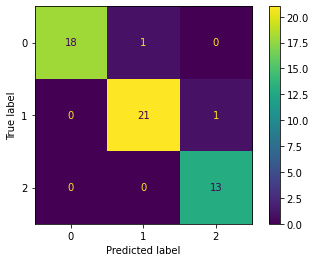

In [8]:
# create confusion matrix, get accuracy

# first, convert tensors to numpy
yte_arr = yte.detach().numpy()
ypr2FINAL_arr = ypr2FINAL.detach().numpy()
ypr_arr = np.argmax(ypr2FINAL_arr,axis=1)

display(ypr_arr)
conf = confusion_matrix(yte_arr, ypr_arr)
acc = (conf[0,0]+conf[1,1]+conf[2,2])/len(ypr_arr)
ConfusionMatrixDisplay(conf).plot()
print(f"Accuracy{acc}")

# Part 3: Image Classification with PyTorch

<img src="https://production-media.paperswithcode.com/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width=500>

In [9]:
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

# "Normalize", for each image, computes (image-mean)/std --> values in [-1,1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


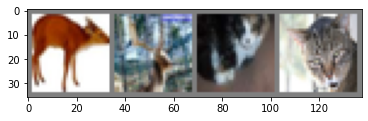

 deer  deer   cat   cat


In [10]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader) #iter() returns an iterator for an object (i.e. something you can iterate over)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [11]:
# Side note from class: 
# How to calculate size of convolution and max pooling output images
# Use the formula (W-K+2P)/S + 1. W: image size, K: kernel size, P:padding, S: stride

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #in_channels=3, out_channels=6, kernel_size=5 
        self.pool = nn.MaxPool2d(2, 2) # 2x2 is the size of our pooling window
        self.conv2 = nn.Conv2d(6, 16, 5) #in_channels=6, out_channels=16, kernel_size=5
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #a fully-connected layer (from 16 channels of 5x5)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [12]:
import torch.optim as optim

# visualization of "momentum" --> https://www.youtube.com/watch?v=qhWperPtnas
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
    
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.187
[1,  4000] loss: 1.808
[1,  6000] loss: 1.681
[1,  8000] loss: 1.592
[1, 10000] loss: 1.525
[1, 12000] loss: 1.463
[2,  2000] loss: 1.409
[2,  4000] loss: 1.367
[2,  6000] loss: 1.340
[2,  8000] loss: 1.327
[2, 10000] loss: 1.296
[2, 12000] loss: 1.275
Finished Training


In [14]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

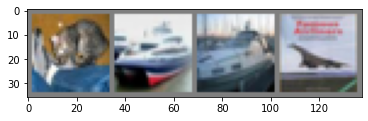

GroundTruth:    cat  ship  ship plane


In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [17]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [18]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 59.9 %
Accuracy for class car   is: 58.0 %
Accuracy for class bird  is: 58.4 %
Accuracy for class cat   is: 42.5 %
Accuracy for class deer  is: 30.8 %
Accuracy for class dog   is: 49.4 %
Accuracy for class frog  is: 50.7 %
Accuracy for class horse is: 63.1 %
Accuracy for class ship  is: 68.5 %
Accuracy for class truck is: 59.2 %
